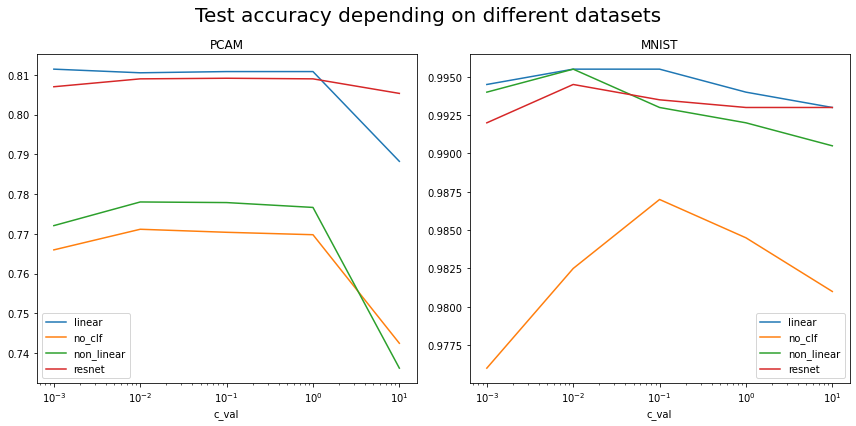

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Enable or disable depending on your pandas needs
# pd.set_option('display.max_colwidth', -1)
# pd.reset_option('all')

def df_from_csv_files(path):
    """
    Return dataframe from multiple csv files stored in directory given by path.
    :param path: Path of directory where csv files are stored.
    :return: pandas dataframe of merged csv files.
    """
    files = [f.replace('\\','/') for f in glob.glob(path + "**/*.csv", recursive=True)]
    df = pd.concat(map(pd.read_csv, files), ignore_index=True)
    return df


def plot_group(df, denom, x, y, exp_map, ax):
    """
    Plot groups given in the dataframe.
    :param df: dataframe to plot.
    :param denom: column by which is grouped.
    :param x: column used as x-axis
    :param y: column used as y-axis
    :param exp_map: dict that is used to map path to displayable denominations.
    :param ax: axis on which it will be plotted.
    """
    df_1 = df[[denom, y, x]].copy()
    df_1[denom].replace(exp_map,inplace=True)
    df_1.set_index(x, inplace=True)
    df_1.groupby(denom)[y].plot(x=x, y=y,ax=ax,  legend=True)
     

# Paths to results of the svm_test
mnist_path = "Path/to/MNIST_Result_Dir"
pcam_path = "Path/to/PCAM_Result_Dir"

# Those maps are used for an easier display in the pandas dataframe, the plots respectively.
# Checkpoints that are used as key in svm_results
# .ckpt files
mnist_exp_map = {
"path/to/model_checkpoint_with_linear_classifier":"linear",
"path/to/model_checkpoint_with_non_linear_classifier":"non_linear",    
"path/to/model_checkpoint_with_no_classifier": "no_clf",       
"path/to/model_checkpoint_with_resnet_classifier": "resnet"}

pcam_exp_map = {
    #See above, just use the paths to the checkpoints of the models that were trained on PCAM
}

df_pcam = df_from_csv_files(pcam_path)
df_mnist = df_from_csv_files(mnist_path)
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6),sharex=True)

plot_group(df_pcam, denom = 'Path',x='c_val', y='test_acc', exp_map=pcam_exp_map, ax=axes[0])
plot_group(df_mnist, denom = 'Path',x='c_val', y='test_acc', exp_map=mnist_exp_map, ax=axes[1])
fig.suptitle('Test accuracy depending on different datasets', fontsize=20)
axes[0].set_title('PCAM')
axes[1].set_title('MNIST')

plt.xscale("log")
plt.tight_layout()   